In [2]:
# Step 2: Move kaggle.json to the right directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download snap/amazon-fine-food-reviews

Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
 86% 209M/242M [00:00<00:00, 428MB/s]
100% 242M/242M [00:00<00:00, 454MB/s]


In [4]:
# Step 4: Unzip the dataset
!unzip amazon-fine-food-reviews.zip

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
import nltk

In [6]:
df = pd.read_csv("Reviews.csv")

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [9]:
# downsampling
df = df.head(500)
df.shape

(500, 10)

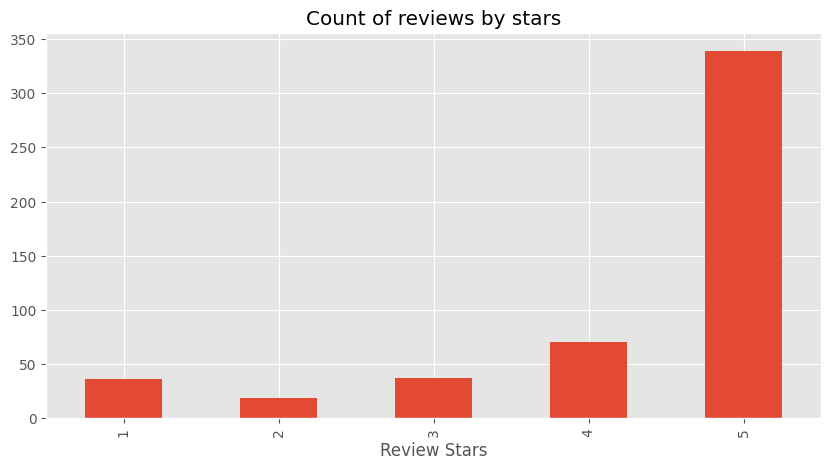

In [10]:
# plotting the scores on a bar graph
axs = (
    df["Score"]
    .value_counts()
    .sort_index()
    .plot(kind="bar", title="Count of reviews by stars", figsize=(10, 5))
)
axs.set_xlabel("Review Stars")
plt.show()

In [11]:
# Basic nltk

example = df["Text"][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [12]:
import nltk

nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [14]:
import nltk

nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [15]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [16]:
import nltk

nltk.download("maxent_ne_chunker_tab")

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [17]:
import nltk

nltk.download("words")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [18]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [19]:
import nltk

nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [21]:
sia.polarity_scores("I am so sad")

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [22]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [23]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [24]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["Text"]
    myid = row["Id"]
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [25]:
# Iterate through the first 10 items and print them
for i, (key, value) in enumerate(res.items()):
    if i < 10:
        print(f"ID: {key}, Scores: {value}")
    else:
        break

ID: 1, Scores: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
ID: 2, Scores: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}
ID: 3, Scores: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}
ID: 4, Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ID: 5, Scores: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}
ID: 6, Scores: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}
ID: 7, Scores: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}
ID: 8, Scores: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}
ID: 9, Scores: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}
ID: 10, Scores: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}


In [26]:
vaders = pd.DataFrame(res).T

In [27]:
vaders = vaders.reset_index().rename(columns={"index": "Id"})
vaders = vaders.merge(df, how="left")

In [28]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


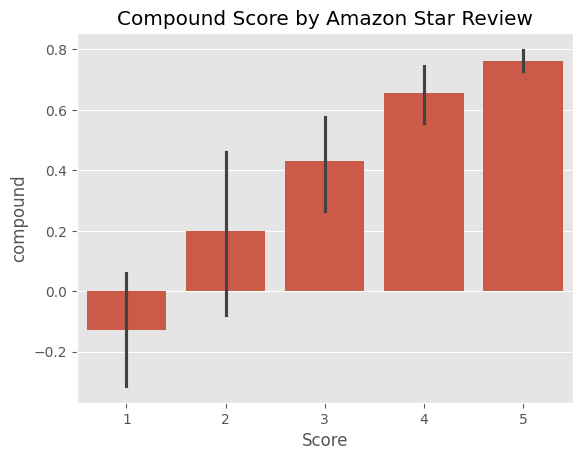

In [29]:
ax = sns.barplot(data=vaders, x="Score", y="compound")
ax.set_title("Compound Score by Amazon Star Review")
plt.show()

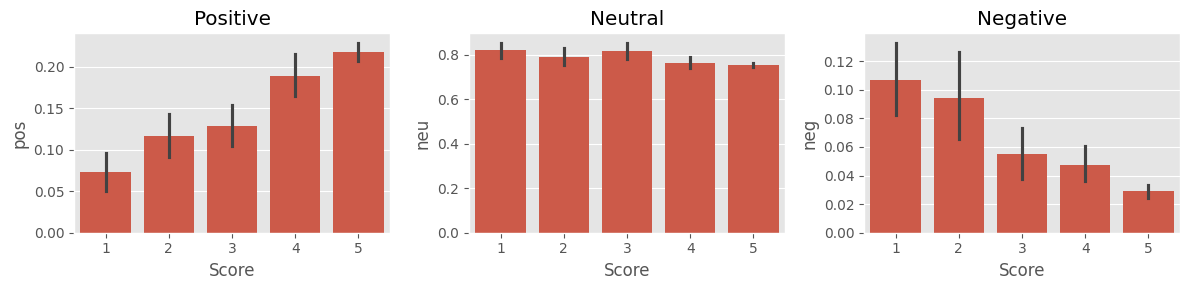

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x="Score", y="pos", ax=axs[0])
sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1])
sns.barplot(data=vaders, x="Score", y="neg", ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()
plt.show()

In [31]:
# roberta pretrained model

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [33]:
# vader results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [34]:
encoded_text = tokenizer(example, return_tensors="pt")

In [35]:
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    "roberta_neg": scores[0],
    "roberta_neu": scores[1],
    "roberta_pos": scores[2],
}
print(scores_dict)

{'roberta_neg': np.float32(0.97635514), 'roberta_neu': np.float32(0.020687465), 'roberta_pos': np.float32(0.0029573706)}


In [38]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        "roberta_neg": scores[0],
        "roberta_neu": scores[1],
        "roberta_pos": scores[2],
    }
    return scores_dict

In [39]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row["Text"]
        myid = row["Id"]
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        res[myid] = vader_result_rename

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"Broke for id {myid}")

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [40]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={"index": "Id"})
results_df = results_df.merge(df, how="left")

In [41]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [42]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

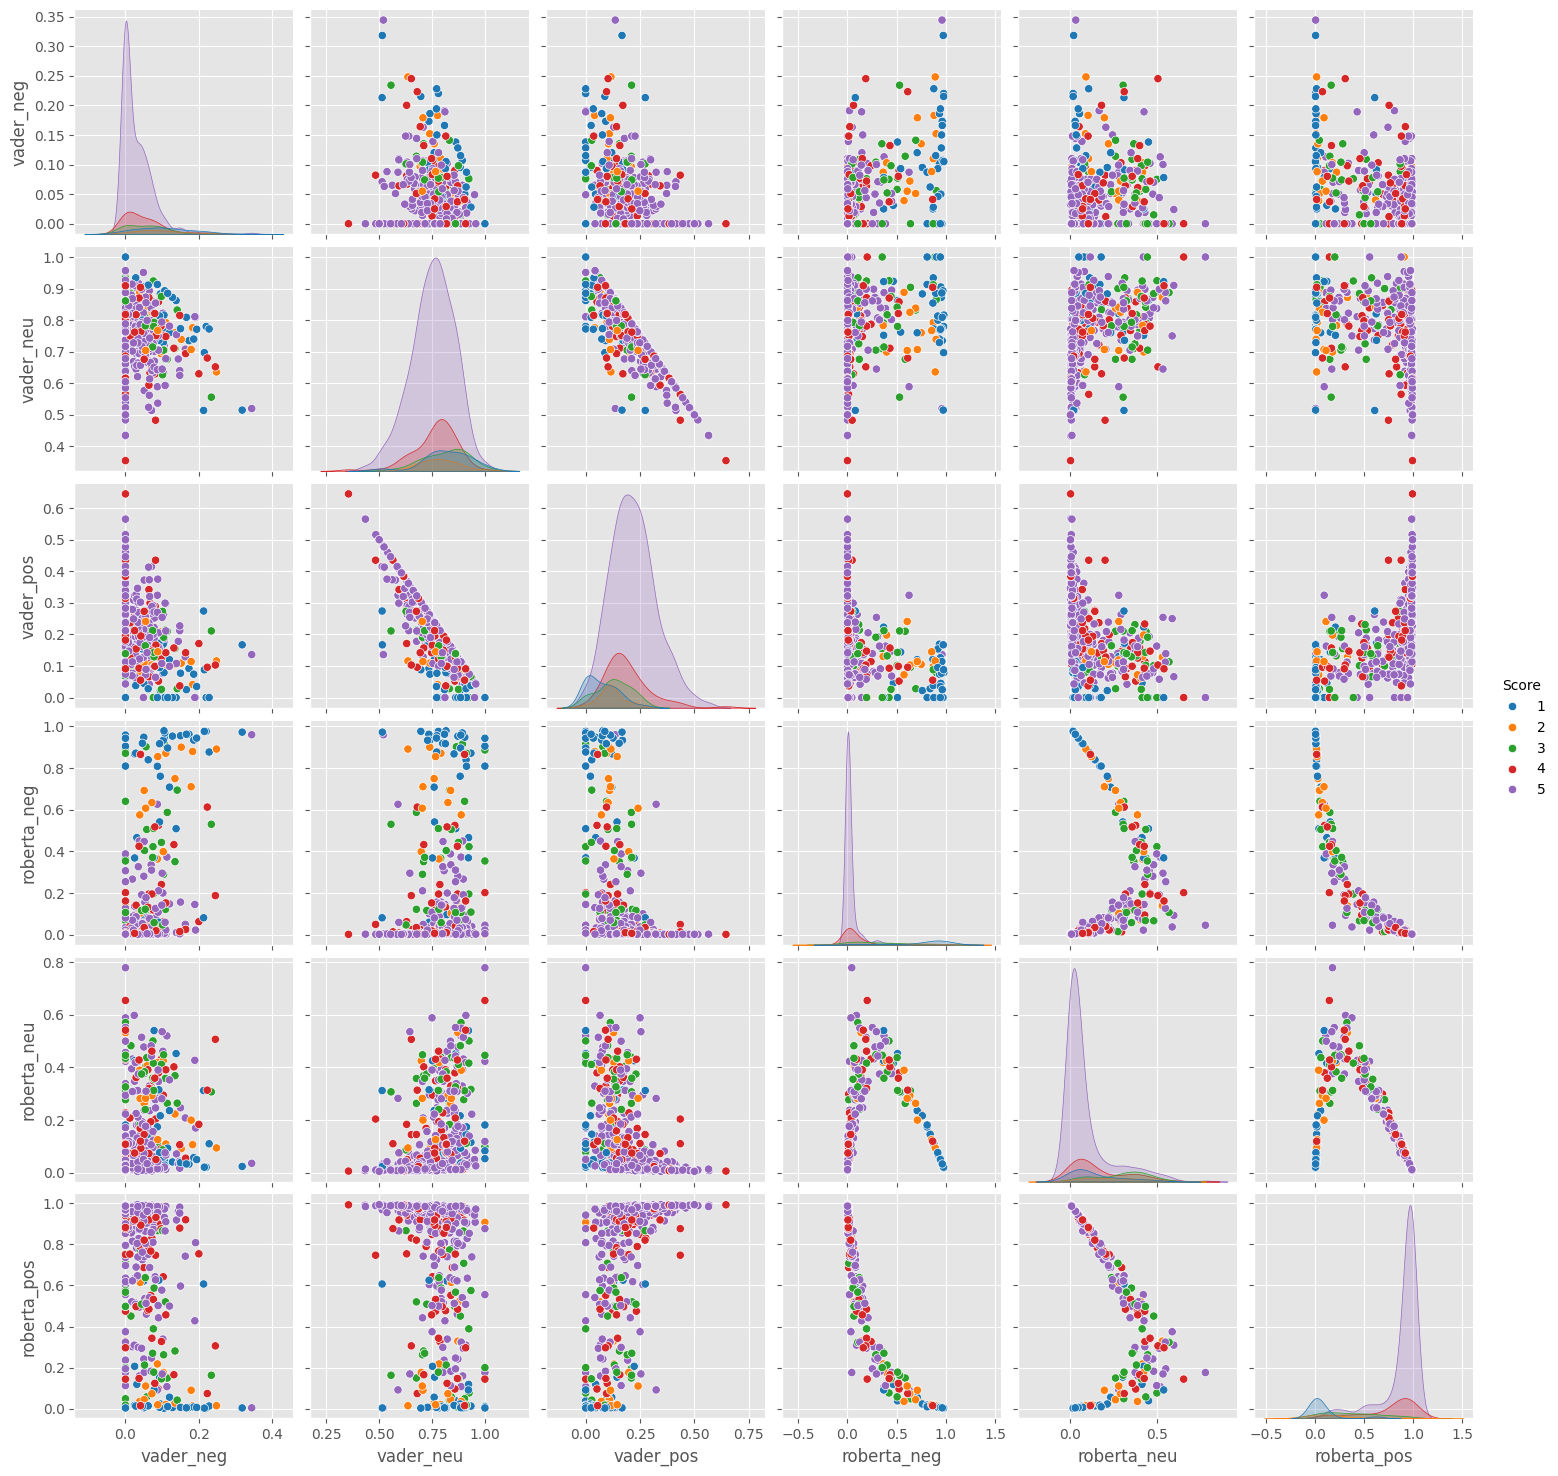

In [43]:
# combine and compare
sns.pairplot(
    data=results_df,
    vars=[
        "vader_neg",
        "vader_neu",
        "vader_pos",
        "roberta_neg",
        "roberta_neu",
        "roberta_pos",
    ],
    hue="Score",
    palette="tab10",
)
plt.show()

In [44]:
# review examples

results_df.query("Score == 1").sort_values("roberta_pos", ascending=False)[
    "Text"
].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

3-CLASS SENTIMENT CLASSIFICATION RESULTS
Accuracy: 0.8520
F1 Score: 0.8534
Precision: 0.8565
Recall: 0.8520

Confusion Matrix:
[[ 42   5   7]
 [ 13   8  16]
 [ 11  22 376]]


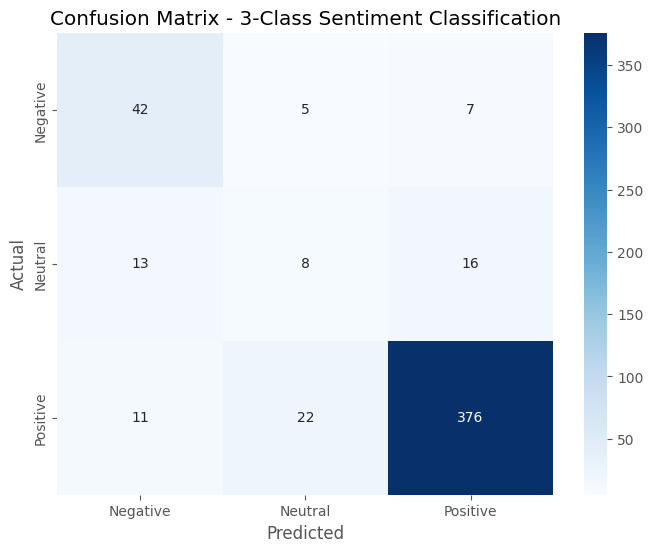

In [45]:
# Import required libraries
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert RoBERTa sentiment scores to predicted labels (3-class)
def get_predicted_sentiment(row):
    """Convert RoBERTa scores to predicted sentiment labels
    Returns: 0 (negative), 1 (neutral), 2 (positive)"""
    scores = [row["roberta_neg"], row["roberta_neu"], row["roberta_pos"]]
    return np.argmax(scores)


# Convert ground truth scores to sentiment labels (if needed)
def convert_score_to_sentiment(score):
    """Convert numeric score to sentiment category"""
    if score <= 2:
        return 0  # Negative
    elif score == 3:
        return 1  # Neutral
    else:
        return 2  # Positive


# Apply predictions to dataframe
results_df["roberta_predicted"] = results_df.apply(get_predicted_sentiment, axis=1)

# Convert ground truth scores to sentiment labels (assuming 1-5 scale in 'Score' column)
if "Score" in results_df.columns:
    results_df["actual_sentiment"] = results_df["Score"].apply(
        convert_score_to_sentiment
    )

# Calculate 3-class classification metrics
print("3-CLASS SENTIMENT CLASSIFICATION RESULTS")
print("=" * 50)

accuracy = accuracy_score(
    results_df["actual_sentiment"], results_df["roberta_predicted"]
)
f1 = f1_score(
    results_df["actual_sentiment"], results_df["roberta_predicted"], average="weighted"
)
precision = precision_score(
    results_df["actual_sentiment"], results_df["roberta_predicted"], average="weighted"
)
recall = recall_score(
    results_df["actual_sentiment"], results_df["roberta_predicted"], average="weighted"
)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(results_df["actual_sentiment"], results_df["roberta_predicted"])
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negative", "Neutral", "Positive"],
    yticklabels=["Negative", "Neutral", "Positive"],
)
plt.title("Confusion Matrix - 3-Class Sentiment Classification")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [54]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
)
import pandas as pd
import numpy as np

# Assuming you have your results_df with columns:
# 'true_label', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos'


# Convert VADER compound scores to predictions
def vader_to_prediction(compound_score):
    if compound_score >= 0.05:
        return 2  #'positive'
    elif compound_score <= -0.05:
        return 0  #'negative'
    else:
        return 1  #'neutral'


# Convert RoBERTa scores to predictions
def roberta_to_prediction(neg, neu, pos):
    scores = {0: neg, 1: neu, 2: pos}  # Use integer labels
    return max(scores, key=scores.get)


# Apply predictions
results_df["vader_pred"] = results_df["vader_compound"].apply(vader_to_prediction)
results_df["roberta_pred"] = results_df.apply(
    lambda row: roberta_to_prediction(
        row["roberta_neg"], row["roberta_neu"], row["roberta_pos"]
    ),
    axis=1,
)



# Calculate metrics for each model
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    return accuracy, f1, precision, recall


# Calculate metrics for all models
y_true = results_df[
    "actual_sentiment"
]

# VADER metrics
vader_metrics = calculate_metrics(y_true, results_df["vader_pred"], "VADER")

# RoBERTa metrics
roberta_metrics = calculate_metrics(y_true, results_df["roberta_pred"], "RoBERTa")



# Confusion Matrix for RoBERTa only
print("\nRoBERTa Confusion Matrix:")
cm = confusion_matrix(y_true, results_df["roberta_pred"])
print(cm)

# Create a summary DataFrame
metrics_df = pd.DataFrame(
    {
        "Model": ["VADER", "RoBERTa"],  # Add 'NLTK' when ready
        "Accuracy": [vader_metrics[0], roberta_metrics[0]],
        "F1_Score": [vader_metrics[1], roberta_metrics[1]],
        "Precision": [vader_metrics[2], roberta_metrics[2]],
        "Recall": [vader_metrics[3], roberta_metrics[3]],
    }
)

print("\nSummary Table:")
print(metrics_df)


VADER Results:
Accuracy: 0.8320
F1 Score: 0.8127
Precision: 0.7999
Recall: 0.8320

RoBERTa Results:
Accuracy: 0.8520
F1 Score: 0.8534
Precision: 0.8565
Recall: 0.8520

RoBERTa Confusion Matrix:
[[ 42   5   7]
 [ 13   8  16]
 [ 11  22 376]]

Summary Table:
     Model  Accuracy  F1_Score  Precision  Recall
0    VADER     0.832  0.812669   0.799949   0.832
1  RoBERTa     0.852  0.853351   0.856489   0.852
